In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

base_path = '/content/drive/My Drive/Colab Notebooks/classificationProject'


In [4]:

data_dir = os.path.join(base_path, 'cancer.csv')

import pandas as pd

cancer = pd.read_csv(data_dir)

In [5]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
cancer.drop(['Unnamed: 32', 'id'], axis =1, inplace = True)

Data Exploration & Preparation

In [7]:
cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
cancer.shape

(569, 31)

In [10]:
cancer.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [11]:
cancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [13]:
missing_values = cancer.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [14]:
cancer.describe(include='O').T

,count,unique,top,freq
diagnosis,569,2,B,357


In [15]:
cancer.diagnosis.replace({"M":1,"B":0},inplace=True)
cancer['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [16]:
l = cancer['diagnosis'].value_counts()
colors = ['darkred','steelblue']


Text(0.5, 1.0, 'Target (%)')

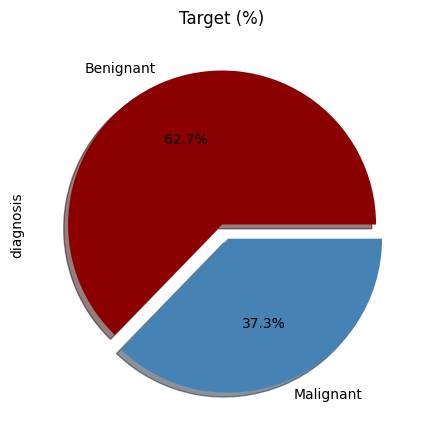

In [17]:
fig = plt.subplots(nrows = 1, figsize = (20,5))
plt.subplot(1,2,1)
l.plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, labels=['Benignant', 'Malignant'], colors=colors)
plt.title('Target (%)')


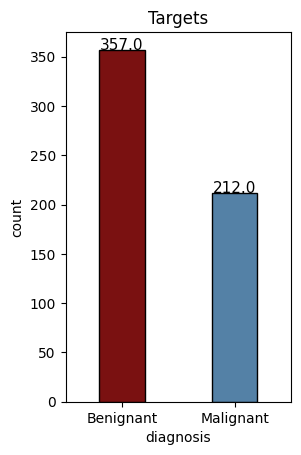

In [73]:
plt.subplot(1,2,2)
ax = sns.countplot(x='diagnosis',data = cancer, palette = colors,edgecolor = 'black', width=0.4)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Benignant', 'Malignant'])
plt.title('Targets')
plt.show()

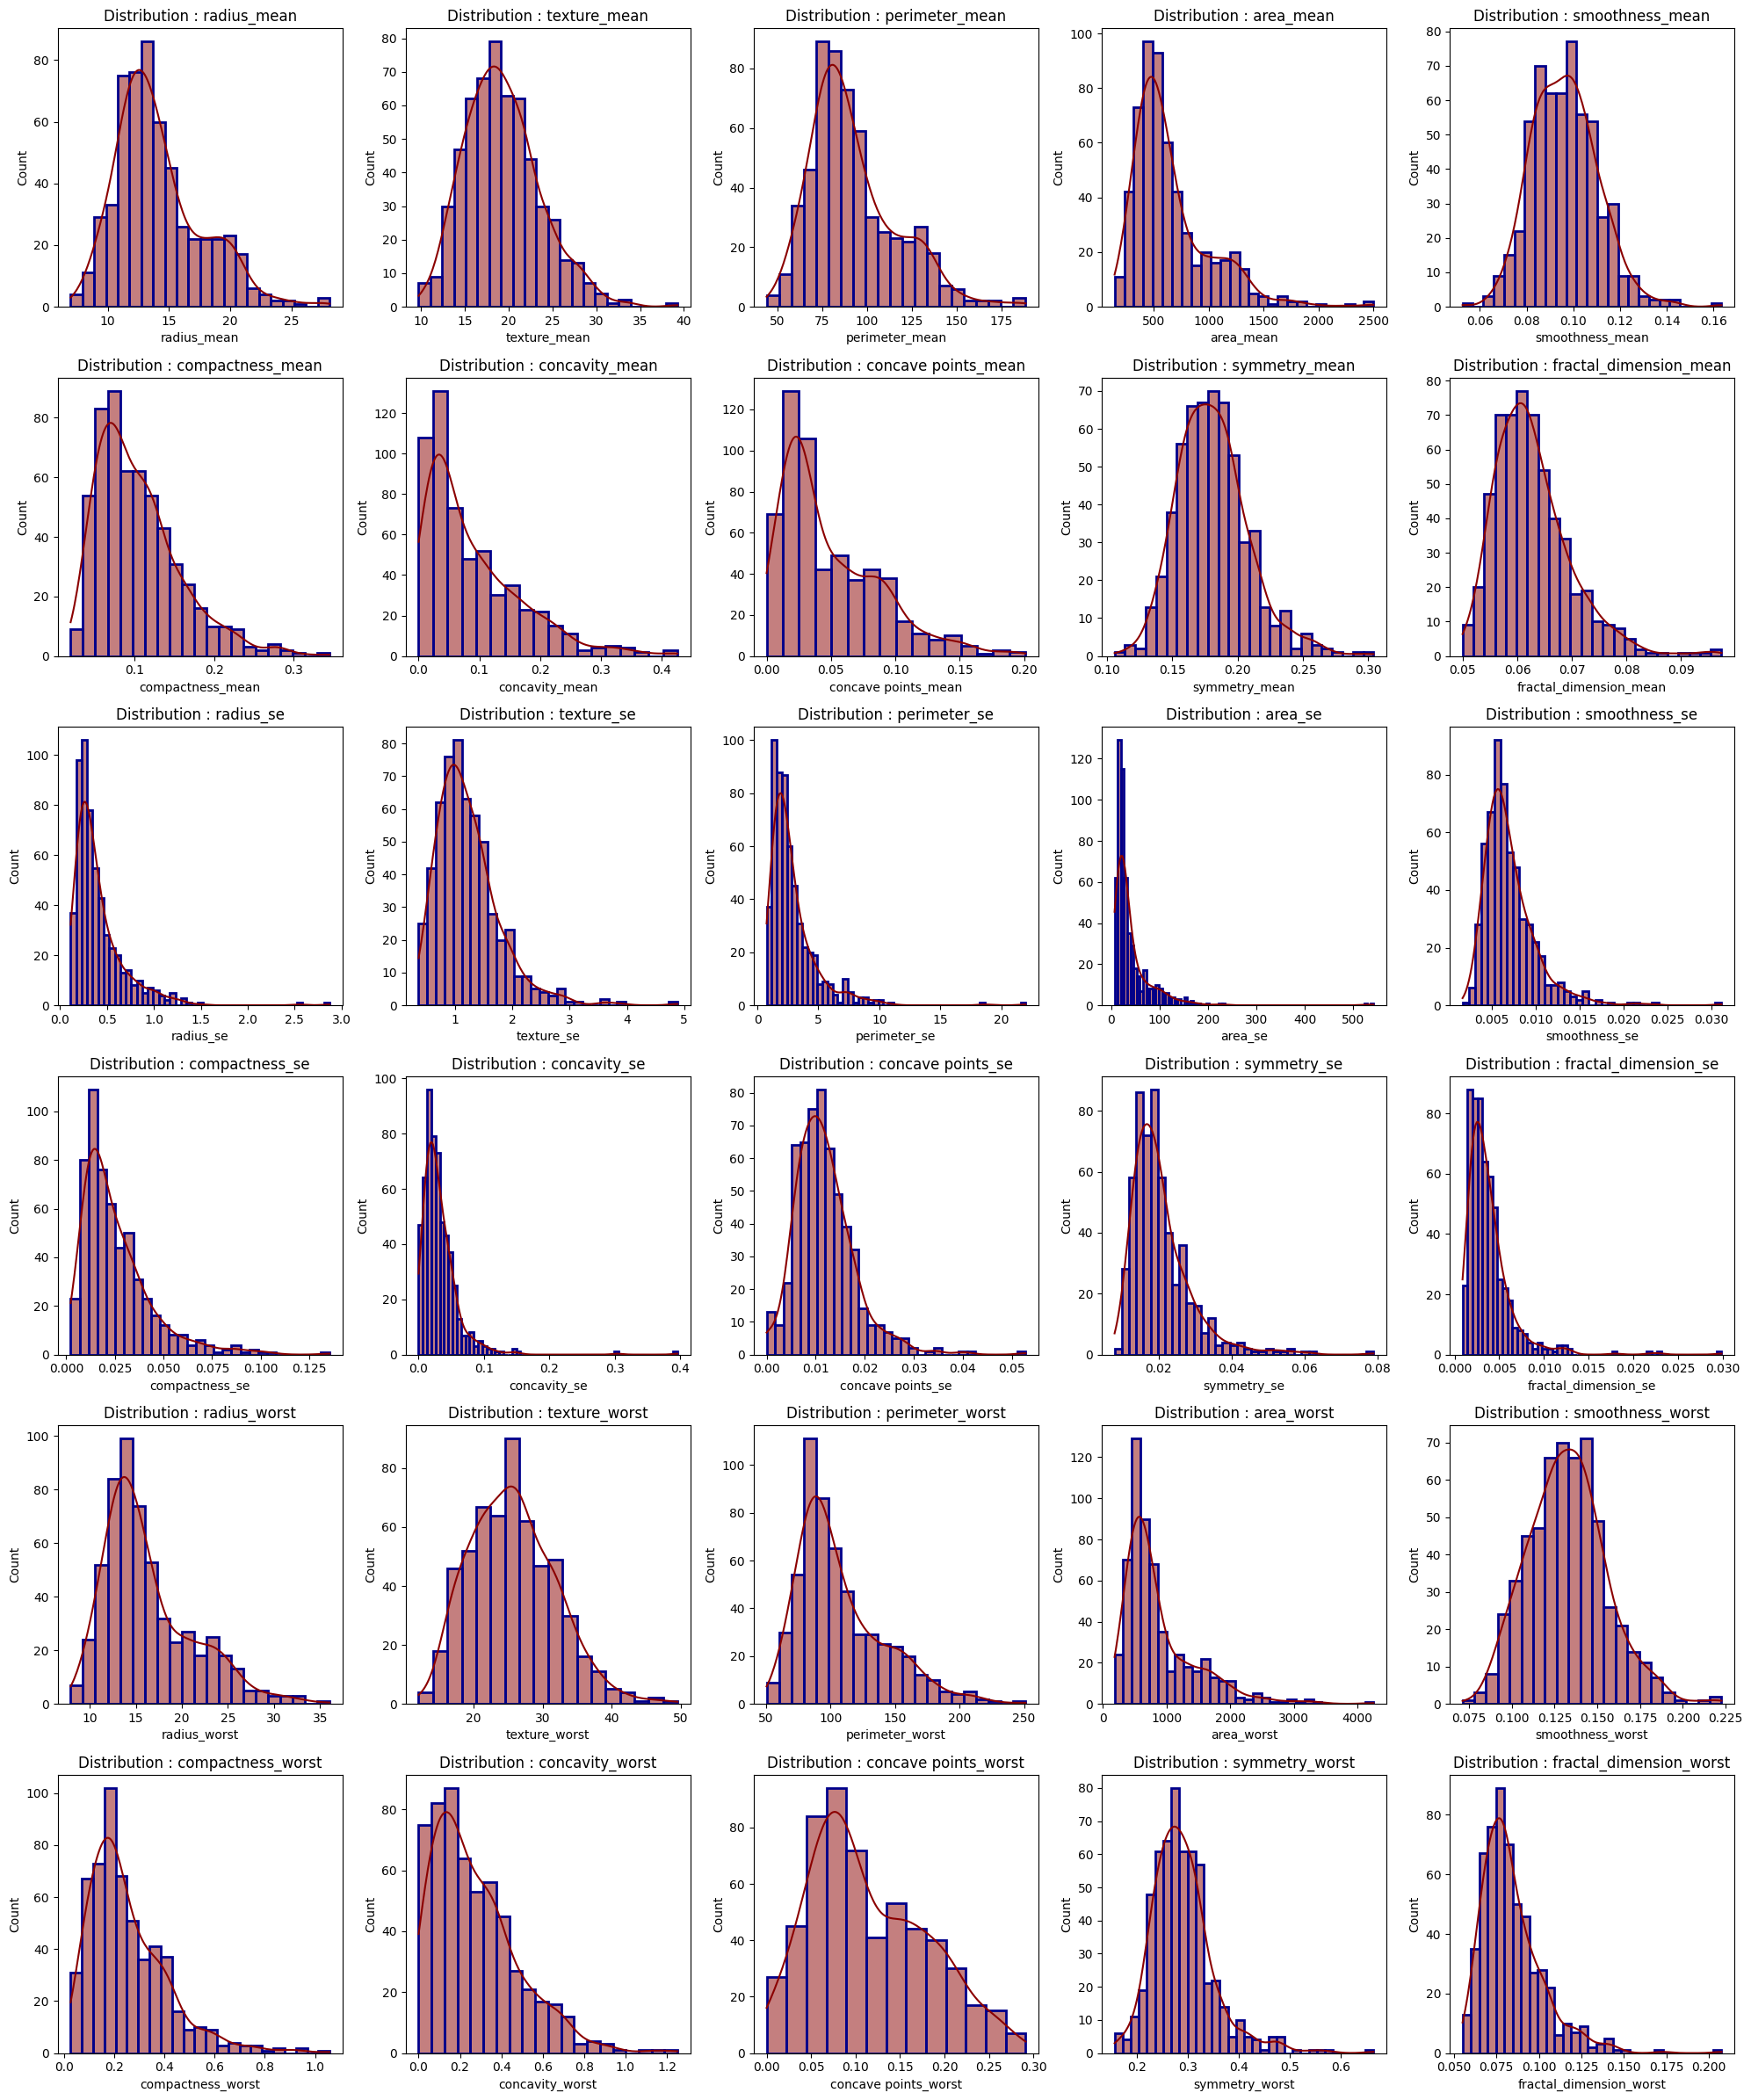

In [31]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(20, 24))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(features):
    row = i // 5
    col = i % 5
    sns.histplot(cancer[feature], ax=ax[row, col], kde=True, color='darkred', edgecolor='darkblue', linewidth=2)
    ax[row, col].set_title('Distribution : ' + feature)

for j in range(i + 1, 30):
    fig.delaxes(ax.flatten()[j])

plt.tight_layout()
plt.show()


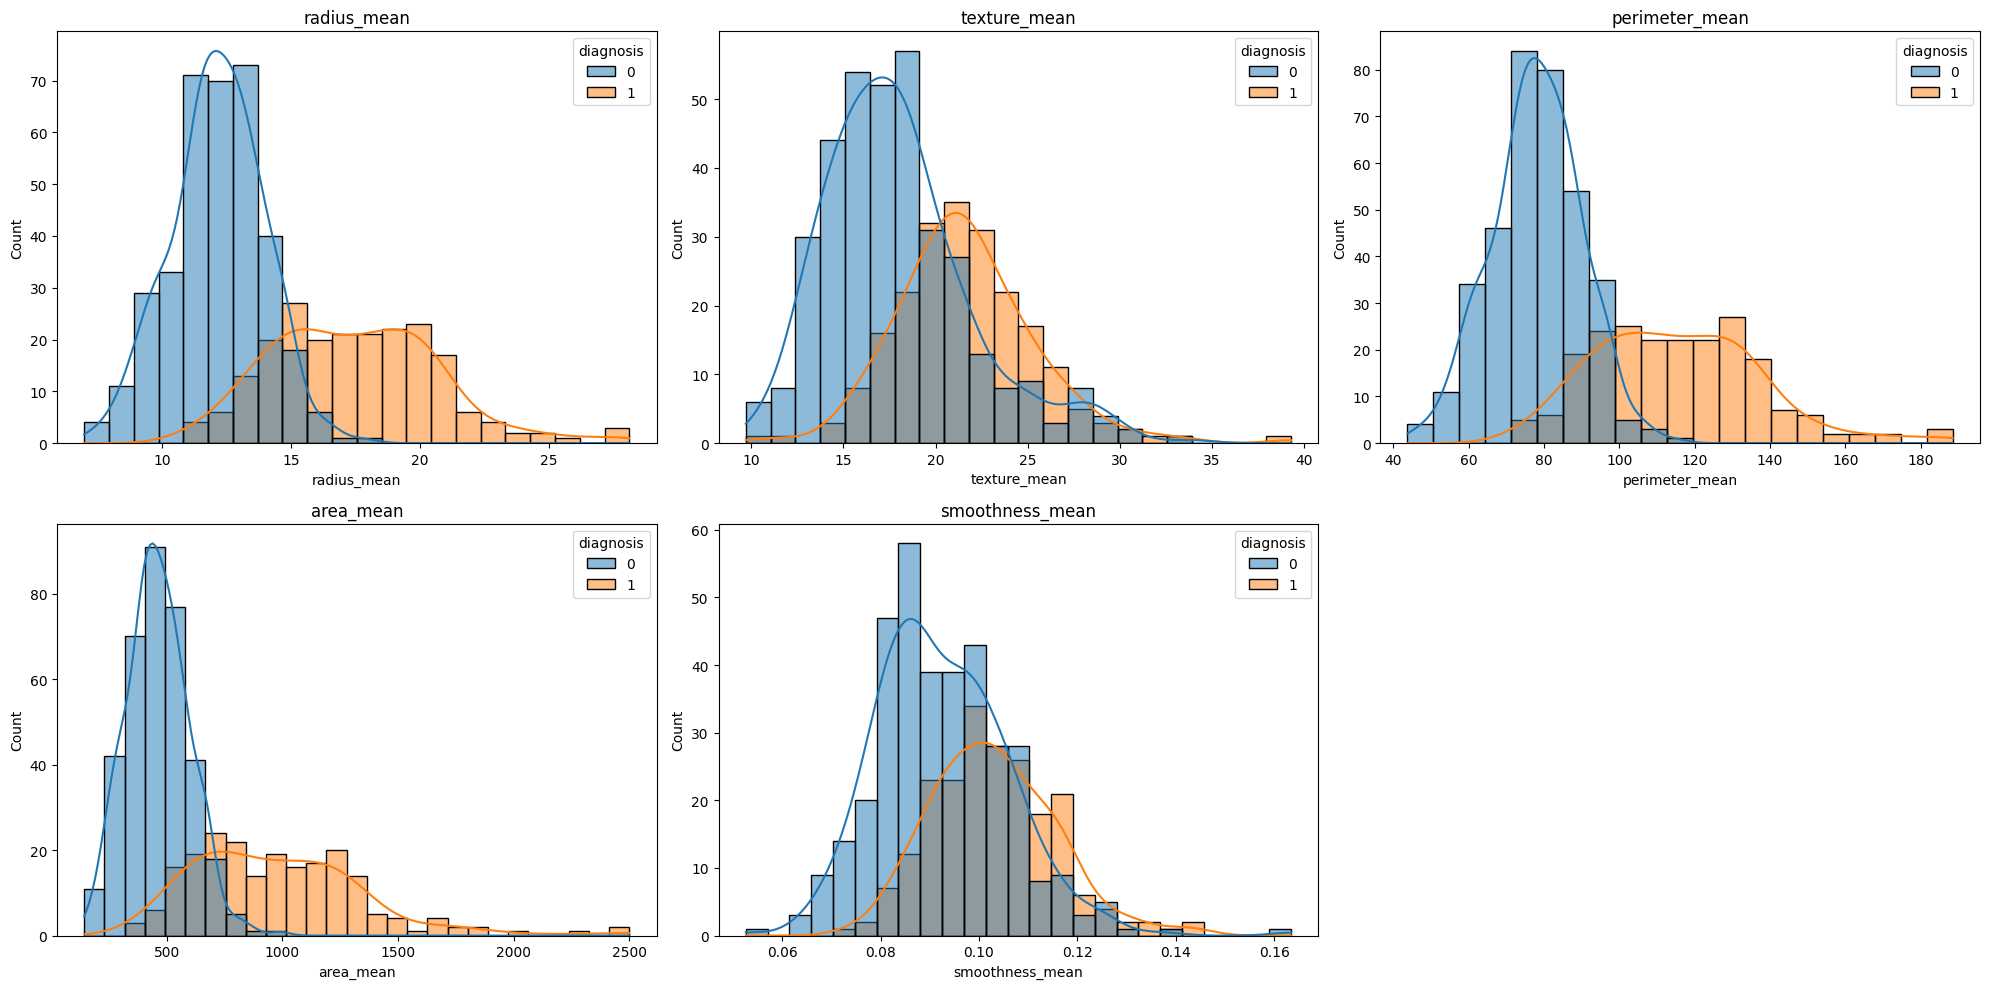

In [32]:
plt.figure(figsize=(20, 10))

features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
n_features = len(features)

for i in range(n_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=cancer, x=features[i], hue='diagnosis', kde=True, alpha=0.5)

if n_features % 2 != 0:
    plt.subplot(2, 3, 6)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [33]:
mms = MinMaxScaler()

for i in cancer.drop(columns=['diagnosis']).columns.to_list():
  cancer[i] = mms.fit_transform(cancer[[i]])

cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


Text(0.5, 1.0, 'Correlation w.r.t diagnosis')

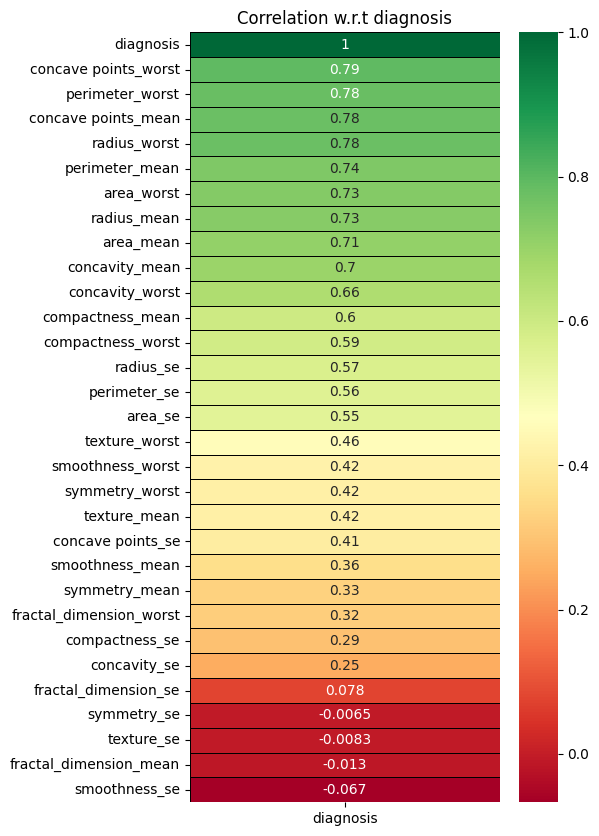

In [34]:
fig, ax = plt.subplots(figsize = (5,10))
corr = cancer.corrwith(cancer['diagnosis']).sort_values(ascending = False).to_frame()
corr.columns = ['diagnosis']
sns.heatmap(corr,annot = True,cmap = 'RdYlGn',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t diagnosis')

In [39]:
correlation = cancer.corr()

<Axes: >

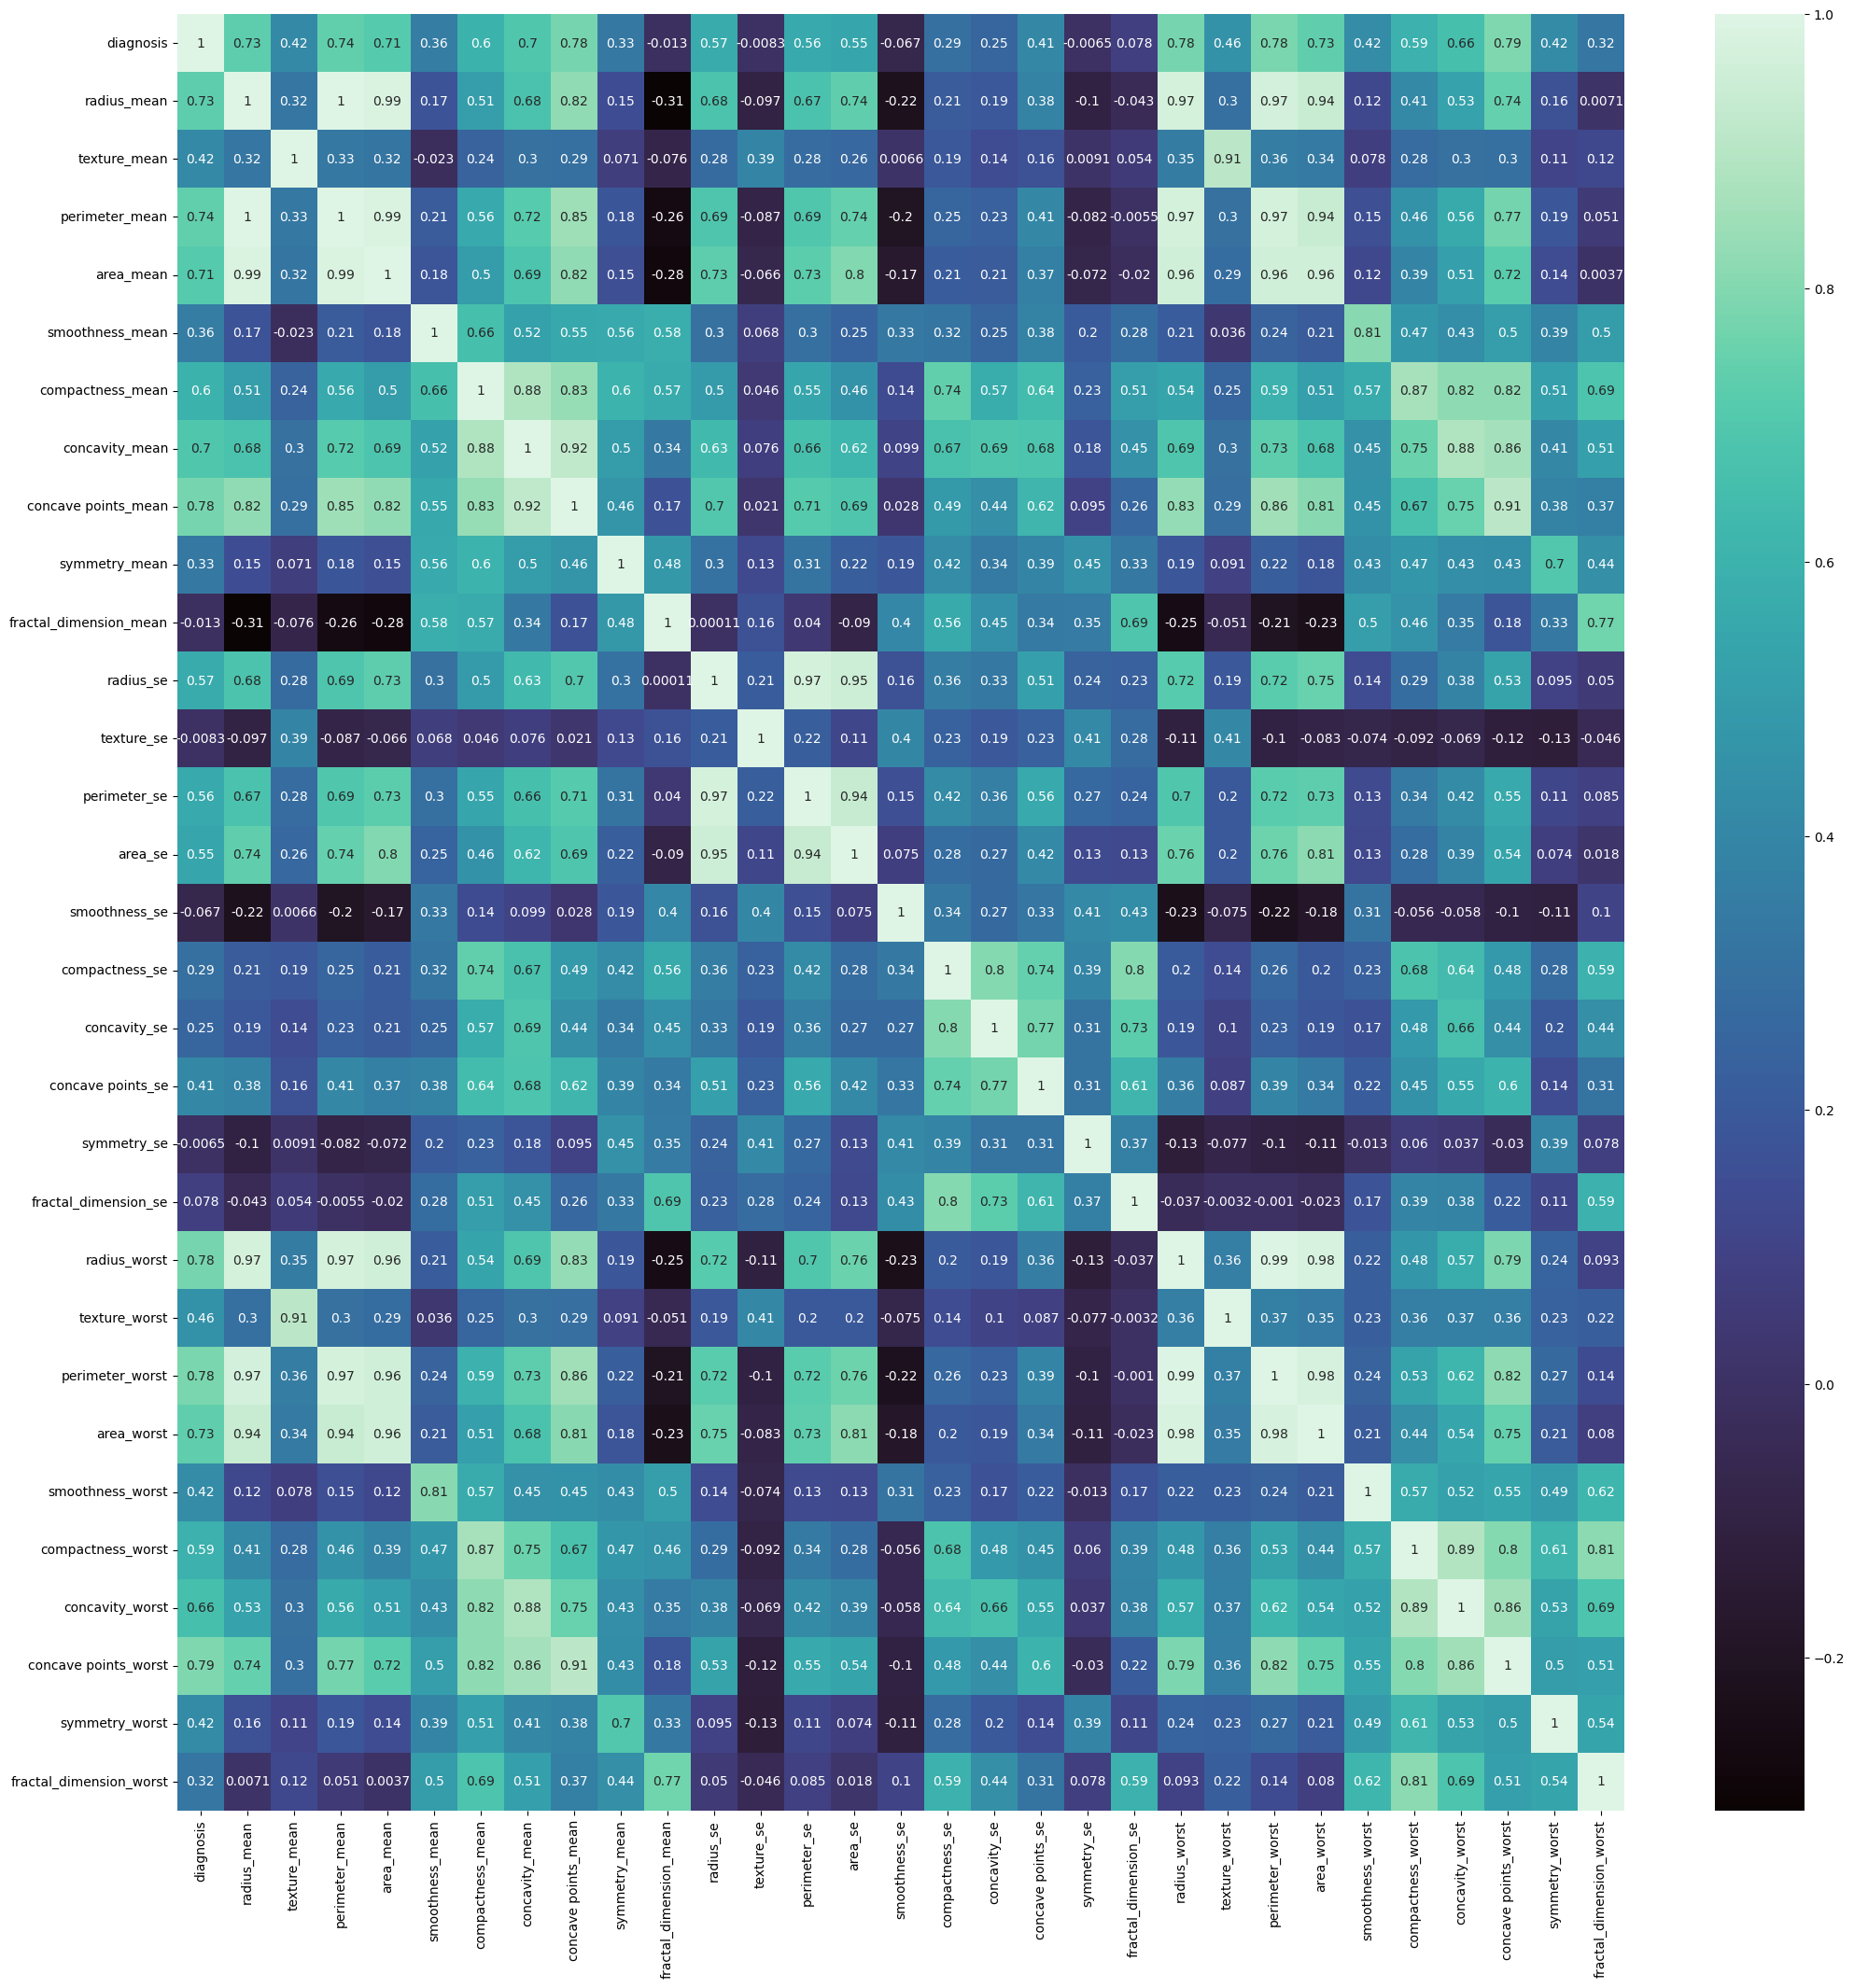

In [40]:
plt.figure(figsize=(25,25))
sns.heatmap(correlation, annot=True, cmap='mako')

<Figure size 1000x800 with 0 Axes>

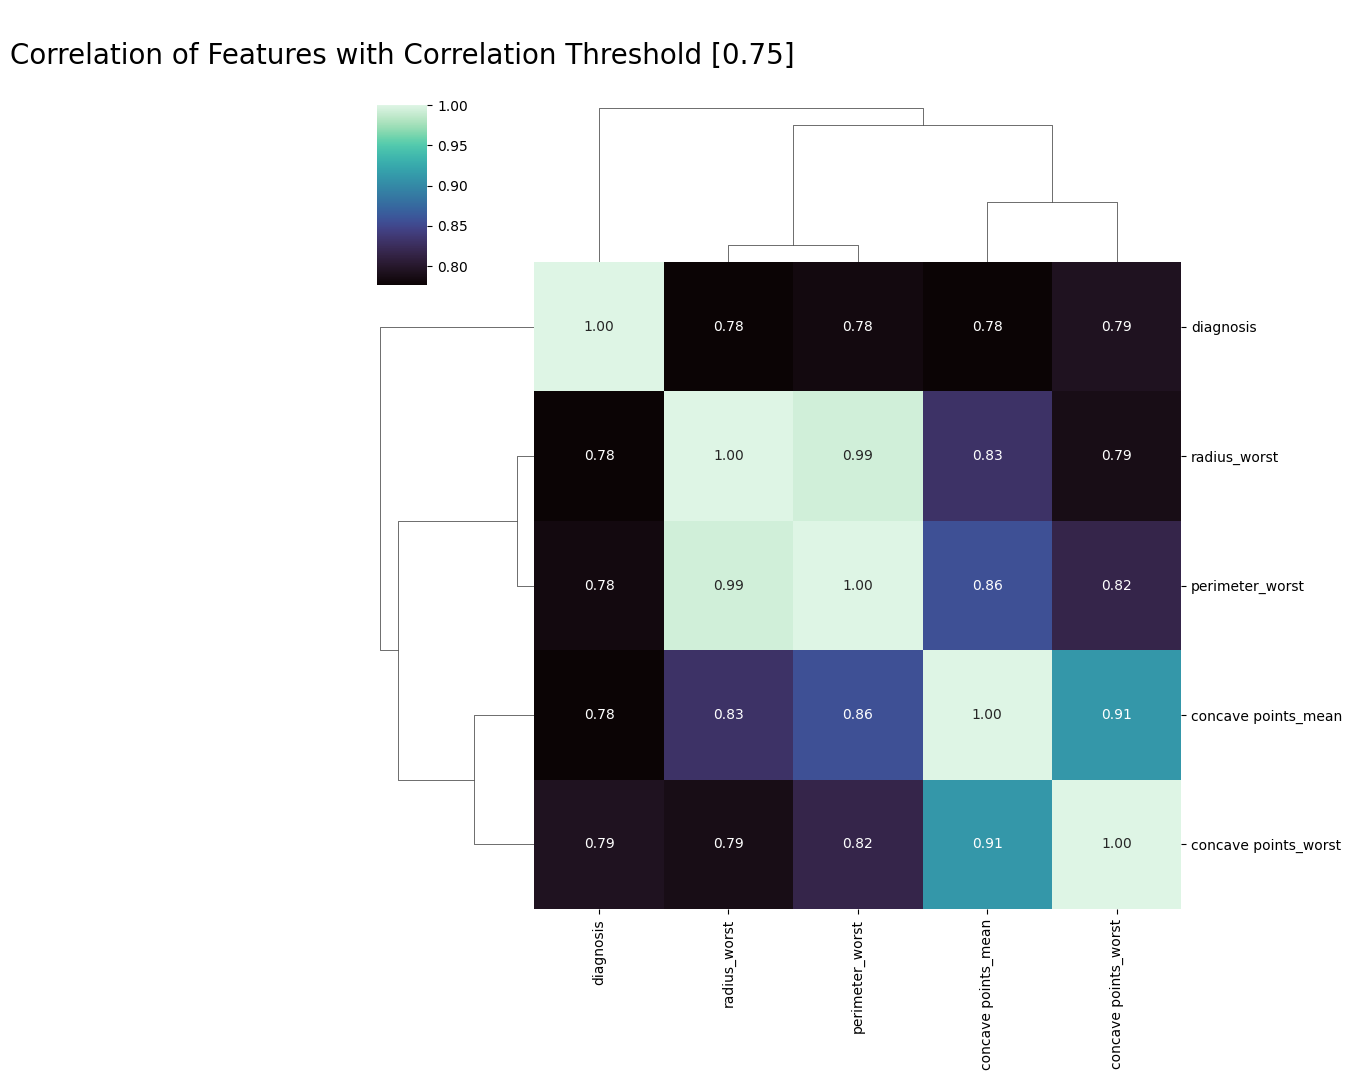

In [42]:
threshold = 0.75
filter = np.abs(correlation["diagnosis"] > threshold)
correlation_features = correlation.columns[filter].tolist()
plt.figure(figsize=(10,8))
sns.clustermap(cancer[correlation_features].corr(), annot = True, fmt = ".2f", cmap='mako')
plt.title("\nCorrelation of Features with Correlation Threshold [0.75]\n",fontsize=20)
plt.show()

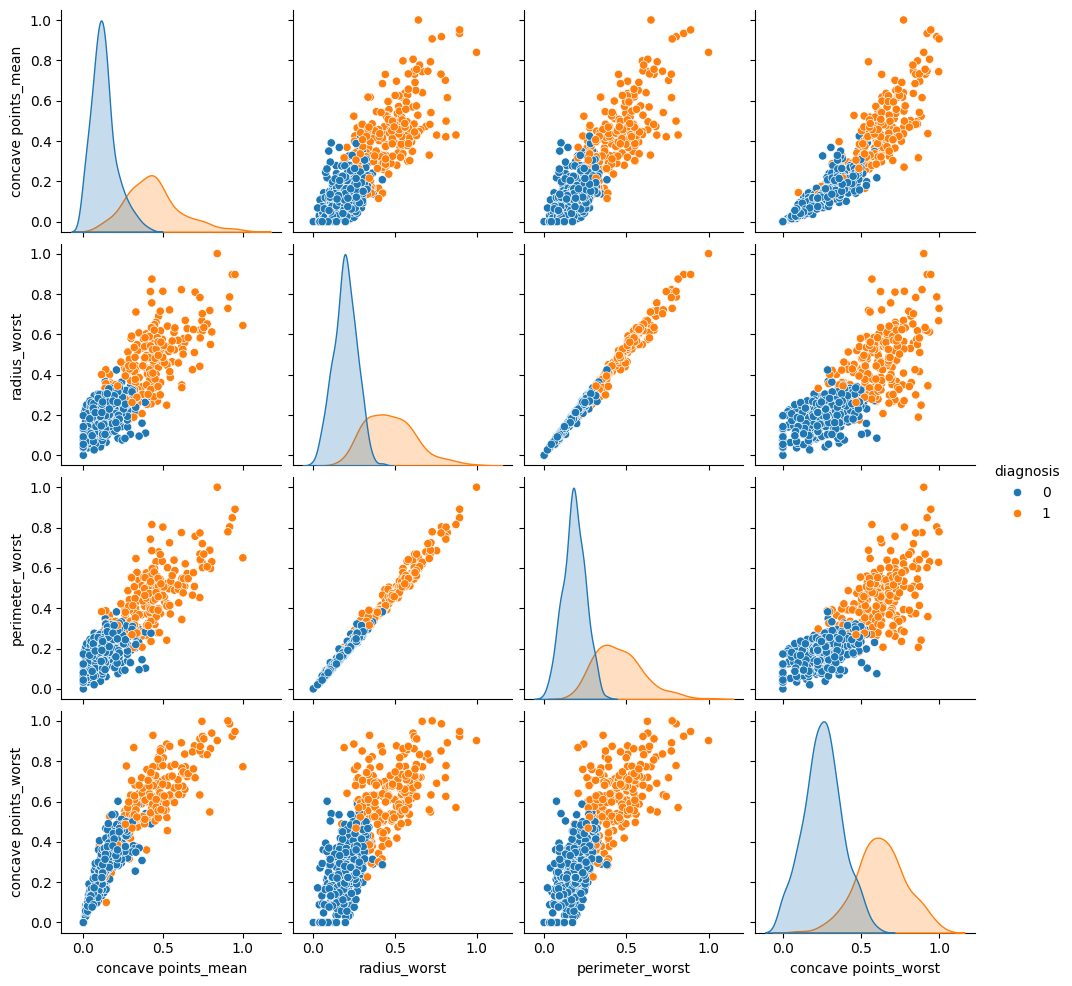

In [43]:
sns.pairplot(cancer[correlation_features], diag_kind = "kde",  hue="diagnosis")
plt.show()

In [44]:
cancer.drop(columns=['fractal_dimension_se', 'smoothness_se', 'symmetry_se', 'texture_se', 'fractal_dimension_mean'], inplace=True)

Modelling

In [45]:
x = cancer.drop(columns='diagnosis')
y = cancer['diagnosis']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [47]:
Algorithm = ['XGBClassifier','LogisticRegression', 'DecisionTreeClassifier','KNeighborsClassifier','RandomForestClassifier']
Accuracy=[]

In [48]:
def algorithm(classifier):
  classifier.fit(x_train, y_train)
  prediction = classifier.predict(x_test)

  cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
  print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
  print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))

  accuracy = accuracy_score(y_test,prediction)

  print('confusion matrix')
  cm = confusion_matrix(y_test,prediction)

  names = ["True Negative","False Positive",'False Negative',"True Positive"]
  counts = [value for value in cm.flatten()]
  percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot = labels, cmap = 'Oranges', fmt ='')

  plt.title("Confusion Matrix")
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

  print(cm)
  print(classification_report(y_test,prediction))
  final_score = accuracy*100
  print('accuracy_score : ' , final_score)

  Accuracy.append(accuracy*100)


def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

XGBoost

In [49]:
# Initializing an XGBoost classifier with specific hyperparameters

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  98.94%
ROC_AUC Score :  98.81%
confusion matrix


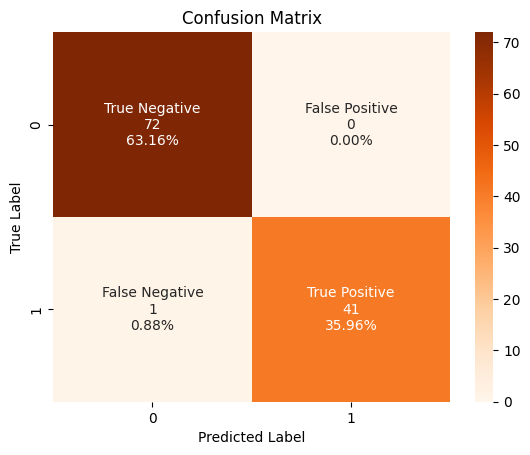

[[72  0]
 [ 1 41]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

accuracy_score :  99.12280701754386


In [50]:
algorithm(classifier_xgb)

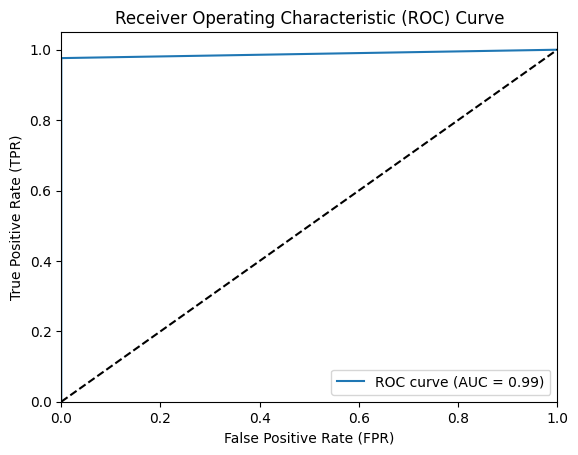

In [51]:
prediction_xgb = classifier_xgb.predict(x_test)
plot_roc_curve(y_test, prediction_xgb)

Logistic Regression

In [52]:
# Initializing a Logistic Regression classifier with specific hyperparameters

classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

Cross Validation Score :  99.38%
ROC_AUC Score :  98.81%
confusion matrix


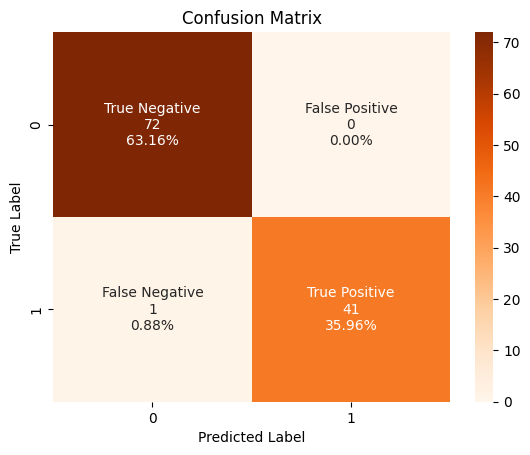

[[72  0]
 [ 1 41]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

accuracy_score :  99.12280701754386


In [53]:
algorithm(classifier_lr)

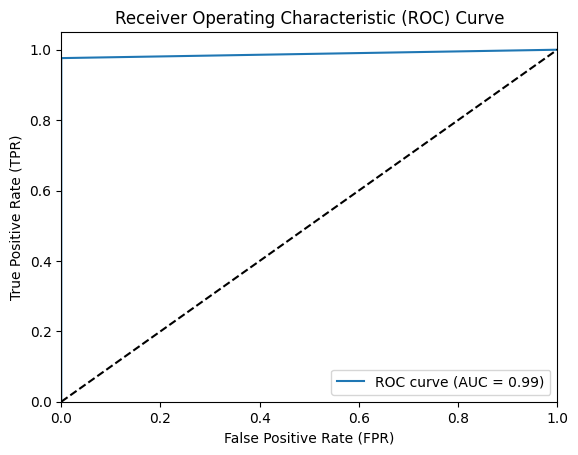

In [54]:
prediction_lr = classifier_lr.predict(x_test)
plot_roc_curve(y_test, prediction_lr)

 Decision Tree

In [55]:
classifier_tree = DecisionTreeClassifier(random_state=101, criterion='entropy', max_depth=4, min_samples_leaf=3)

Cross Validation Score :  93.73%
ROC_AUC Score :  94.35%
confusion matrix


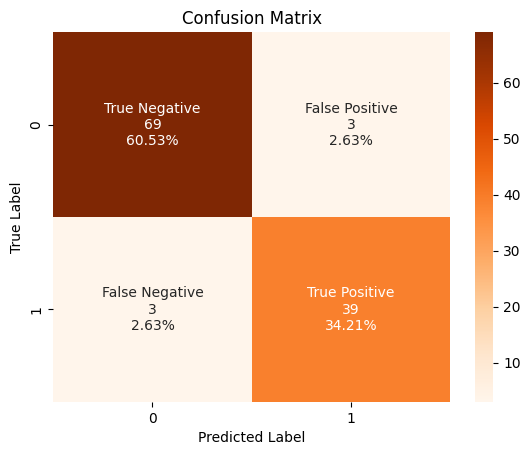

[[69  3]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

accuracy_score :  94.73684210526315


In [56]:
algorithm(classifier_tree)

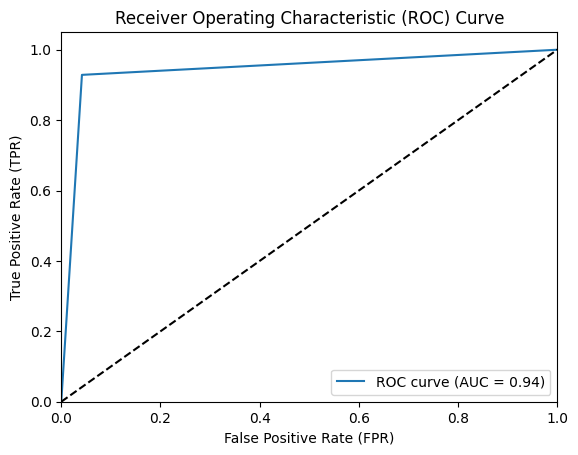

In [57]:
prediction_tree = classifier_tree.predict(x_test)
plot_roc_curve(y_test, prediction_tree)

K-Nearest Neighbors

In [59]:
# Initializing a K-Nearest Neighbors Classifier with specific hyperparameters

classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Cross Validation Score :  98.20%
ROC_AUC Score :  98.12%
confusion matrix


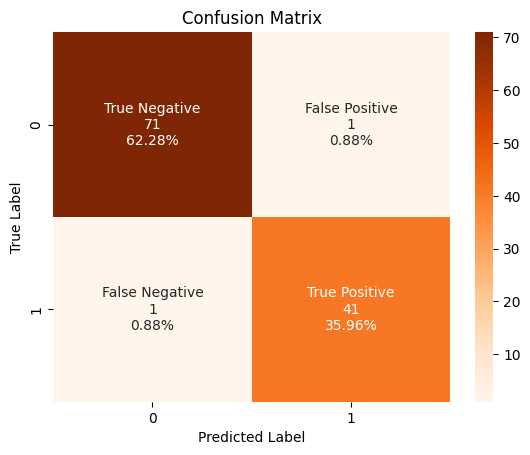

[[71  1]
 [ 1 41]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

accuracy_score :  98.24561403508771


In [60]:
algorithm(classifier_knn)

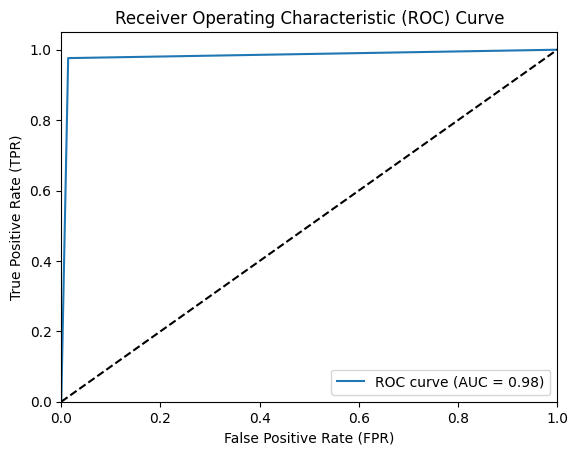

In [61]:
prediction_knn = classifier_knn.predict(x_test)
plot_roc_curve(y_test, prediction_knn)

Random Forest

In [62]:
# Initializing a Random Forest Classifier with specific hyperparameters

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0, n_estimators=100)

Cross Validation Score :  98.73%
ROC_AUC Score :  95.73%
confusion matrix


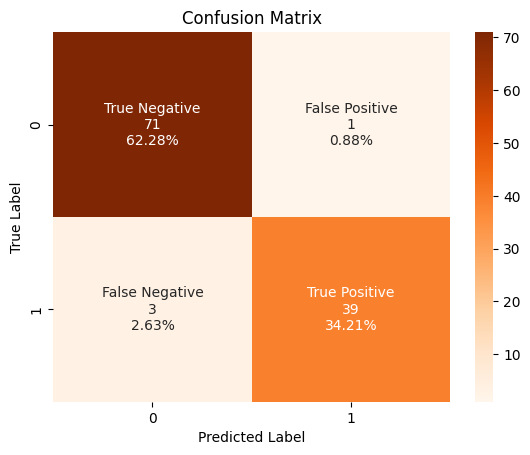

[[71  1]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

accuracy_score :  96.49122807017544


In [63]:
algorithm(classifier_rf)

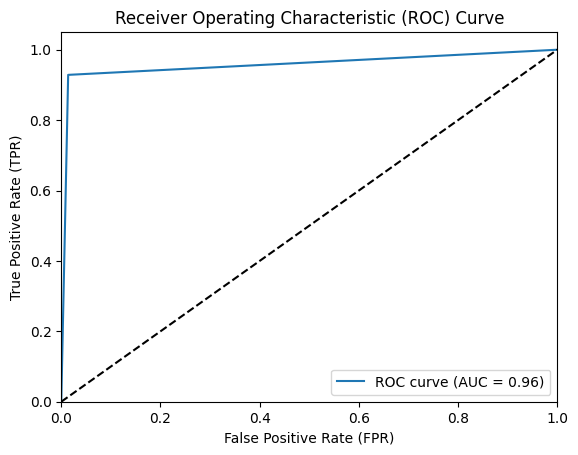

In [64]:
# Making predictions using the Random Forest Classifier and plotting the ROC curve

prediction_rf = classifier_rf.predict(x_test)
plot_roc_curve(y_test, prediction_rf)

In [65]:
print(Accuracy)

[99.12280701754386, 99.12280701754386, 94.73684210526315, 98.24561403508771, 96.49122807017544]


Comparison

In [66]:
result = pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy})
result

,Algorithm,Accuracy
0,XGBClassifier,99.122807
1,LogisticRegression,99.122807
2,DecisionTreeClassifier,94.736842
3,KNeighborsClassifier,98.245614
4,RandomForestClassifier,96.491228


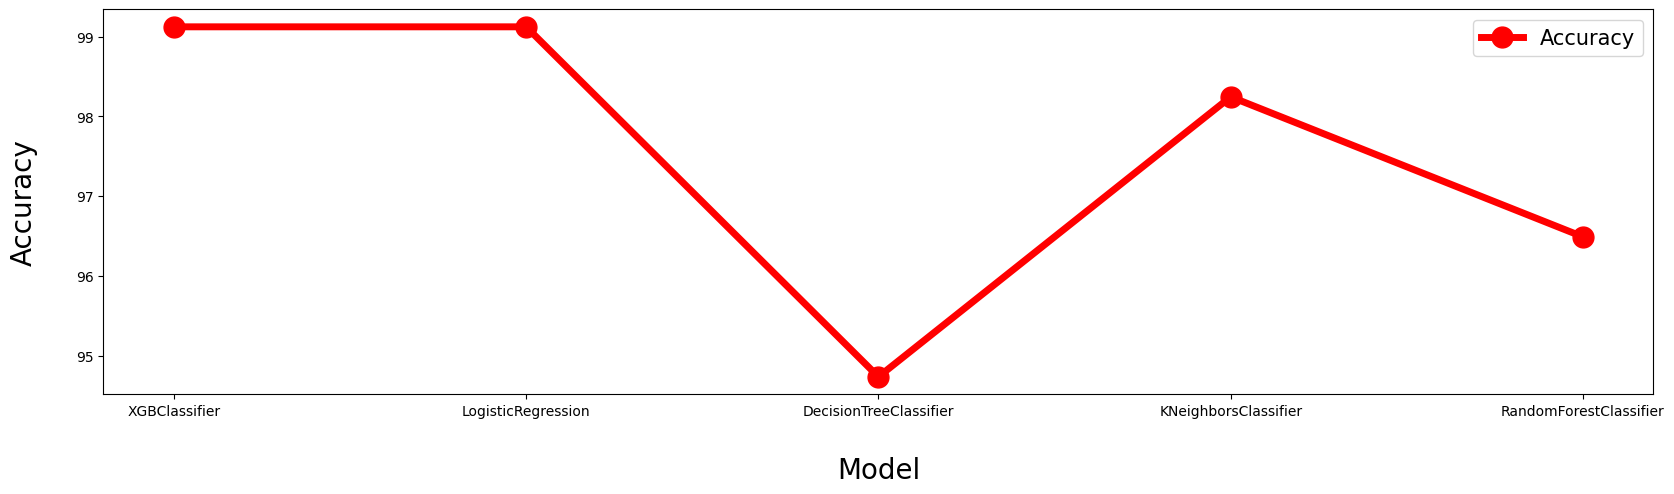

In [72]:
fig = plt.figure(figsize=(20,5))
plt.plot(result.Algorithm,result.Accuracy,label='Accuracy',lw=5,color='Red',marker='o',markersize = 15)
plt.legend(fontsize=15)
plt.xlabel('\nModel',fontsize= 20)
plt.ylabel('Accuracy\n',fontsize= 20)
plt.show()

dataset source: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic